In [1]:
import plotly.io as pio

pio.renderers.default = "vscode+jupyterlab+notebook_connected"

## Project 2: Relationship Analysis & Visualization

- Author: Chloe Yu

I want to explore the question: How can we use job openings from different sector to understand the monetary policy changes in the federal fund rate? This leading macroeconomic indicator in theory would serve as a scope into understanding the ex-post monetary consequences and the ex-ante monetary policy actions that shapes the federal fund rate. 

### 1. Data Loading:

First of all, we will need to import all of the necessary Python libraries to help assist with our exploratory data analysis. 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

We collected all of the important datasets from the FRED (Federal Reserve Economic Database) website, and loaded here in our local environment. 

[Date Source](https://fred.stlouisfed.org/series/JTSJOL)

`https://fred.stlouisfed.org/series/JTSJOL`

In [4]:
# Load datasets
job_openings = pd.read_csv('data/jobopenings.csv')
fed_funds = pd.read_csv('data/FEDFUNDS.csv')

In [84]:
fed_funds = fed_funds.rename(columns={'DATE': 'Date', 'FEDFUNDS': 'Federal Fund Rate'})
fed_funds.head()

,Date,Federal Fund Rate
0,2014-01-01,0.07
1,2014-02-01,0.07
2,2014-03-01,0.08
3,2014-04-01,0.09
4,2014-05-01,0.09


In [85]:
job_openings.head()

,DATE,JTSJOL,JTS2300JOL,JTS3000JOL,JTS540099JOL,JTS7000JOL,JTU5100JOL,JTS6200JOL,JTS9000JOL,JTU480099JOL
0,2014-01-01,6,155,261,713,596,110,630,389,174
1,2014-02-01,246,139,286,848,558,102,660,402,118
2,2014-03-01,15,125,282,773,571,102,678,425,140
3,2014-04-01,178,116,275,842,662,128,642,435,160
4,2014-05-01,181,119,294,857,710,104,734,441,157


### 2. Data Processing

The job_openings data frame is somewhat confusing as all of the column is encoded in its short form, as a result, we do not know how to interpret them without constant reference to the encoding table. So here we will rename the columns.

In [105]:
job_openings.rename(columns={
    'DATE': 'Date',
    'JTSJOL': 'Job Openings: Total Nonfarm',
    'JTS2300JOL': 'Construction',
    'JTS3000JOL': 'Manufacturing',
    'JTS540099JOL': 'Professional and Business Services',
    'JTS9000JOL': 'Government',
    'JTU5100JOL': 'Information',
    'JTS4400JOL': 'Retail Trade',
    'JTU480099JOL': 'Transportation, Warehousing, and Utilities',
    'JTS7100JOL': 'Arts, Entertainment, and Recreation',
    'JTU5300JOL': 'Real Estate and Rental and Leasing',
    'JTU4200JOL': 'Wholesale Trade',
    'JTS7000JOL': 'Leisure and Hospitality',
    'JTS6200JOL': 'Health Care and Social Assistance'
}, inplace=True)

job_openings.head()

,Date,Job Openings: Total Nonfarm,Construction,Manufacturing,Professional and Business Services,Leisure and Hospitality,Information,Health Care and Social Assistance,Government,"Transportation, Warehousing, and Utilities"
0,2014-01-01,6,155,261,713,596,110,630,389,174
1,2014-02-01,246,139,286,848,558,102,660,402,118
2,2014-03-01,15,125,282,773,571,102,678,425,140
3,2014-04-01,178,116,275,842,662,128,642,435,160
4,2014-05-01,181,119,294,857,710,104,734,441,157


Then we should convert the datetime that is recorded as a str into a format that can be computed with by pandas

In [106]:
# Convert 'date' columns to datetime format
job_openings['Date'] = pd.to_datetime(job_openings['Date'])
fed_funds['Date'] = pd.to_datetime(fed_funds['Date'])

In [107]:
merged_data = pd.merge(job_openings, fed_funds, on='Date', how='inner')

Let's take a look at our merged dataset. We use the plotting library from Matplotlib to make the graph.

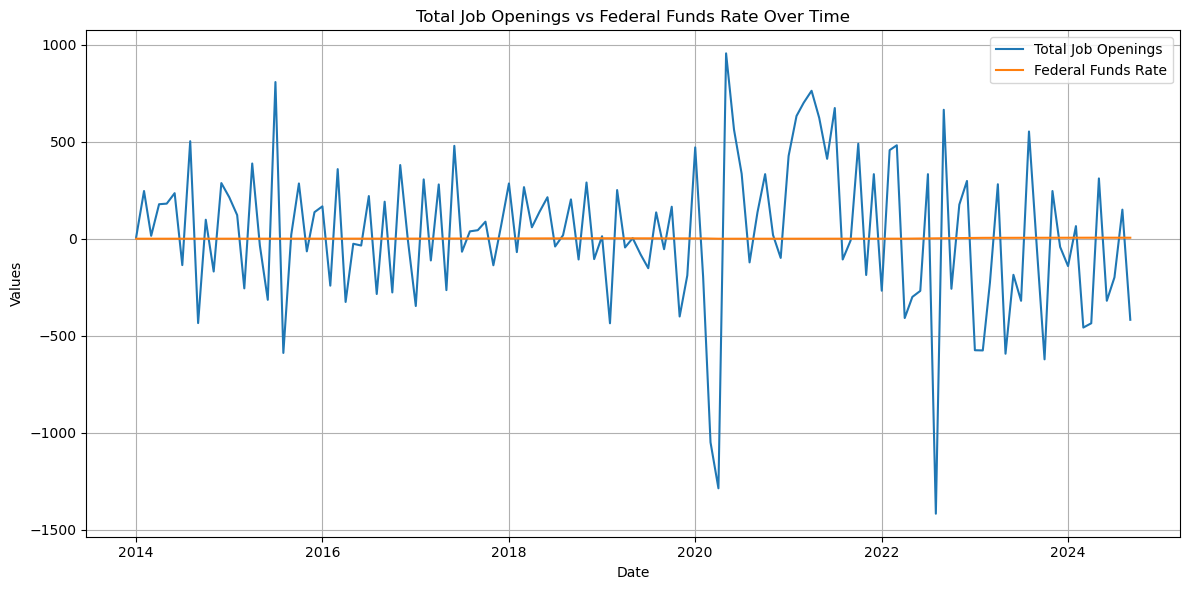

In [108]:
plt.figure(figsize=(12, 6))
plt.plot(merged_data['Date'], merged_data['Job Openings: Total Nonfarm'], label='Total Job Openings')
plt.plot(merged_data['Date'], merged_data['Federal Fund Rate'], label='Federal Funds Rate')
plt.title('Total Job Openings vs Federal Funds Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

The end result is pretty, but it does not tell us a lot of story. The federal fund rate is in a scale only noticable in %, but job openings is in in level (with unit in thousands). The scale difference compressed the federal fund rate to be insignificant in our analysis. It is literally a straight line above visually. We need to scale the job opening data to something that makes more sense. 

Here we utilize a tool called MinMax Scaler so that we can normalize job openings data to range[0, 1]. 

In [115]:
from sklearn.preprocessing import MinMaxScaler

sector_columns = job_openings.columns[1:]  # Exclude the 'date' column

scaler = MinMaxScaler(feature_range=(-1,1))
job_openings_normalized = job_openings.copy()
job_openings_normalized[sector_columns] = scaler.fit_transform(job_openings[sector_columns])

print("Normalized Job Openings Dataset:")
job_openings_normalized.tail()


Normalized Job Openings Dataset:


,Date,Job Openings: Total Nonfarm,Construction,Manufacturing,Professional and Business Services,Leisure and Hospitality,Information,Health Care and Social Assistance,Government,"Transportation, Warehousing, and Utilities"
124,2024-05-01,0.456613,0.470588,-0.116848,-0.061656,-0.213092,-0.385281,0.390903,0.626566,-0.155206
125,2024-06-01,-0.074979,0.076471,-0.421196,-0.264827,-0.153203,-0.653680,0.302571,0.571429,0.033399
126,2024-07-01,0.026959,-0.317647,-0.336957,-0.013506,-0.122563,-0.350649,0.100857,0.208020,-0.269155
127,2024-08-01,0.320977,0.247059,-0.375000,-0.129771,0.008357,-0.567100,0.125906,0.403509,-0.131631
128,2024-09-01,-0.157540,0.011765,-0.402174,-0.039342,-0.146240,-0.316017,-0.108767,0.072682,-0.296660


Now it seems that the scale is compressed within the range, let's plot the job opening data in various sectors with matplotlib! 

### 3. Data Visualization

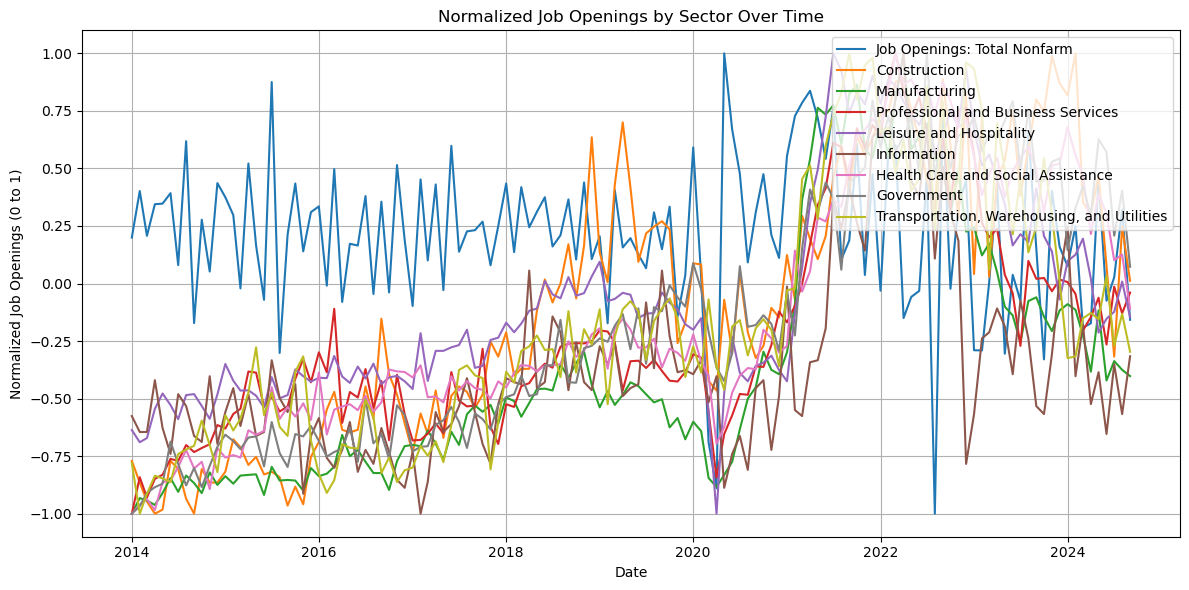

In [116]:
plt.figure(figsize=(12, 6))
for col in sector_columns:
    plt.plot(job_openings_normalized['Date'], job_openings_normalized[col], label=col)

plt.title('Normalized Job Openings by Sector Over Time')
plt.xlabel('Date')
plt.ylabel('Normalized Job Openings (0 to 1)')
plt.legend(loc='upper right')  # Move the legend inside the graph

plt.grid()
plt.tight_layout()
plt.show()

Now we make another adjustment to federal fund rate, to percentage change. So that both dataset is a measurement with basis in "change' within the scale.  

In [117]:
# Calculate the percentage change for the Federal Funds Rate
fed_funds['Federal Funds Rate (% Change)'] = fed_funds['Federal Fund Rate'].pct_change()  

# Merge with normalized job openings data
merged_data = pd.merge(job_openings_normalized, fed_funds, on='Date', how='inner')

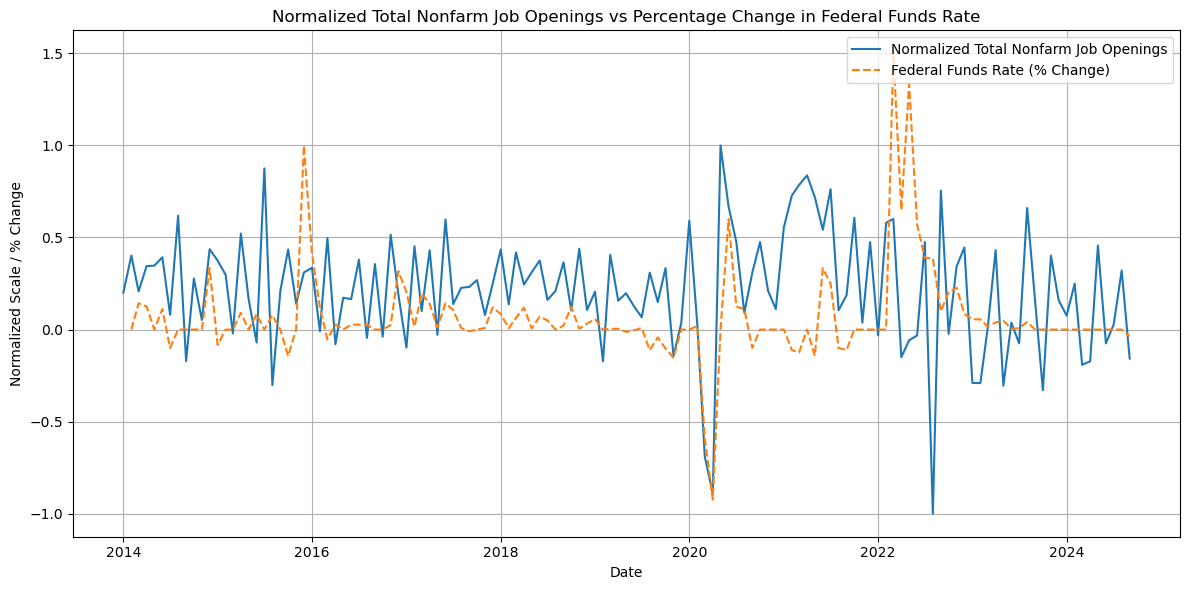

In [118]:
# Visualization: Percentage Change in Federal Funds Rate and Normalized Job Openings
plt.figure(figsize=(12, 6))
plt.plot(merged_data['Date'], merged_data['Job Openings: Total Nonfarm'], label='Normalized Total Nonfarm Job Openings')
plt.plot(merged_data['Date'], merged_data['Federal Funds Rate (% Change)'], label='Federal Funds Rate (% Change)', linestyle='--')

plt.title('Normalized Total Nonfarm Job Openings vs Percentage Change in Federal Funds Rate')
plt.xlabel('Date')
plt.ylabel('Normalized Scale / % Change')
plt.legend(loc='upper right')  # Move the legend inside the graph
plt.grid()
plt.tight_layout()
plt.show()